In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/breast-histopathology-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-histopathology-images


In [ ]:
!pip install tensorflow

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random


In [ ]:

breast_img = []
base_path = "/content/drive/MyDrive/dataset/sdb"

for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith(".png") or file.endswith(".jpg"):
            breast_img.append(os.path.join(folder_path, file))

N_IDC, P_IDC = [], []
for img_path in breast_img:
    if img_path[-5] == '0':
        N_IDC.append(img_path)
    elif img_path[-5] == '1':
        P_IDC.append(img_path)


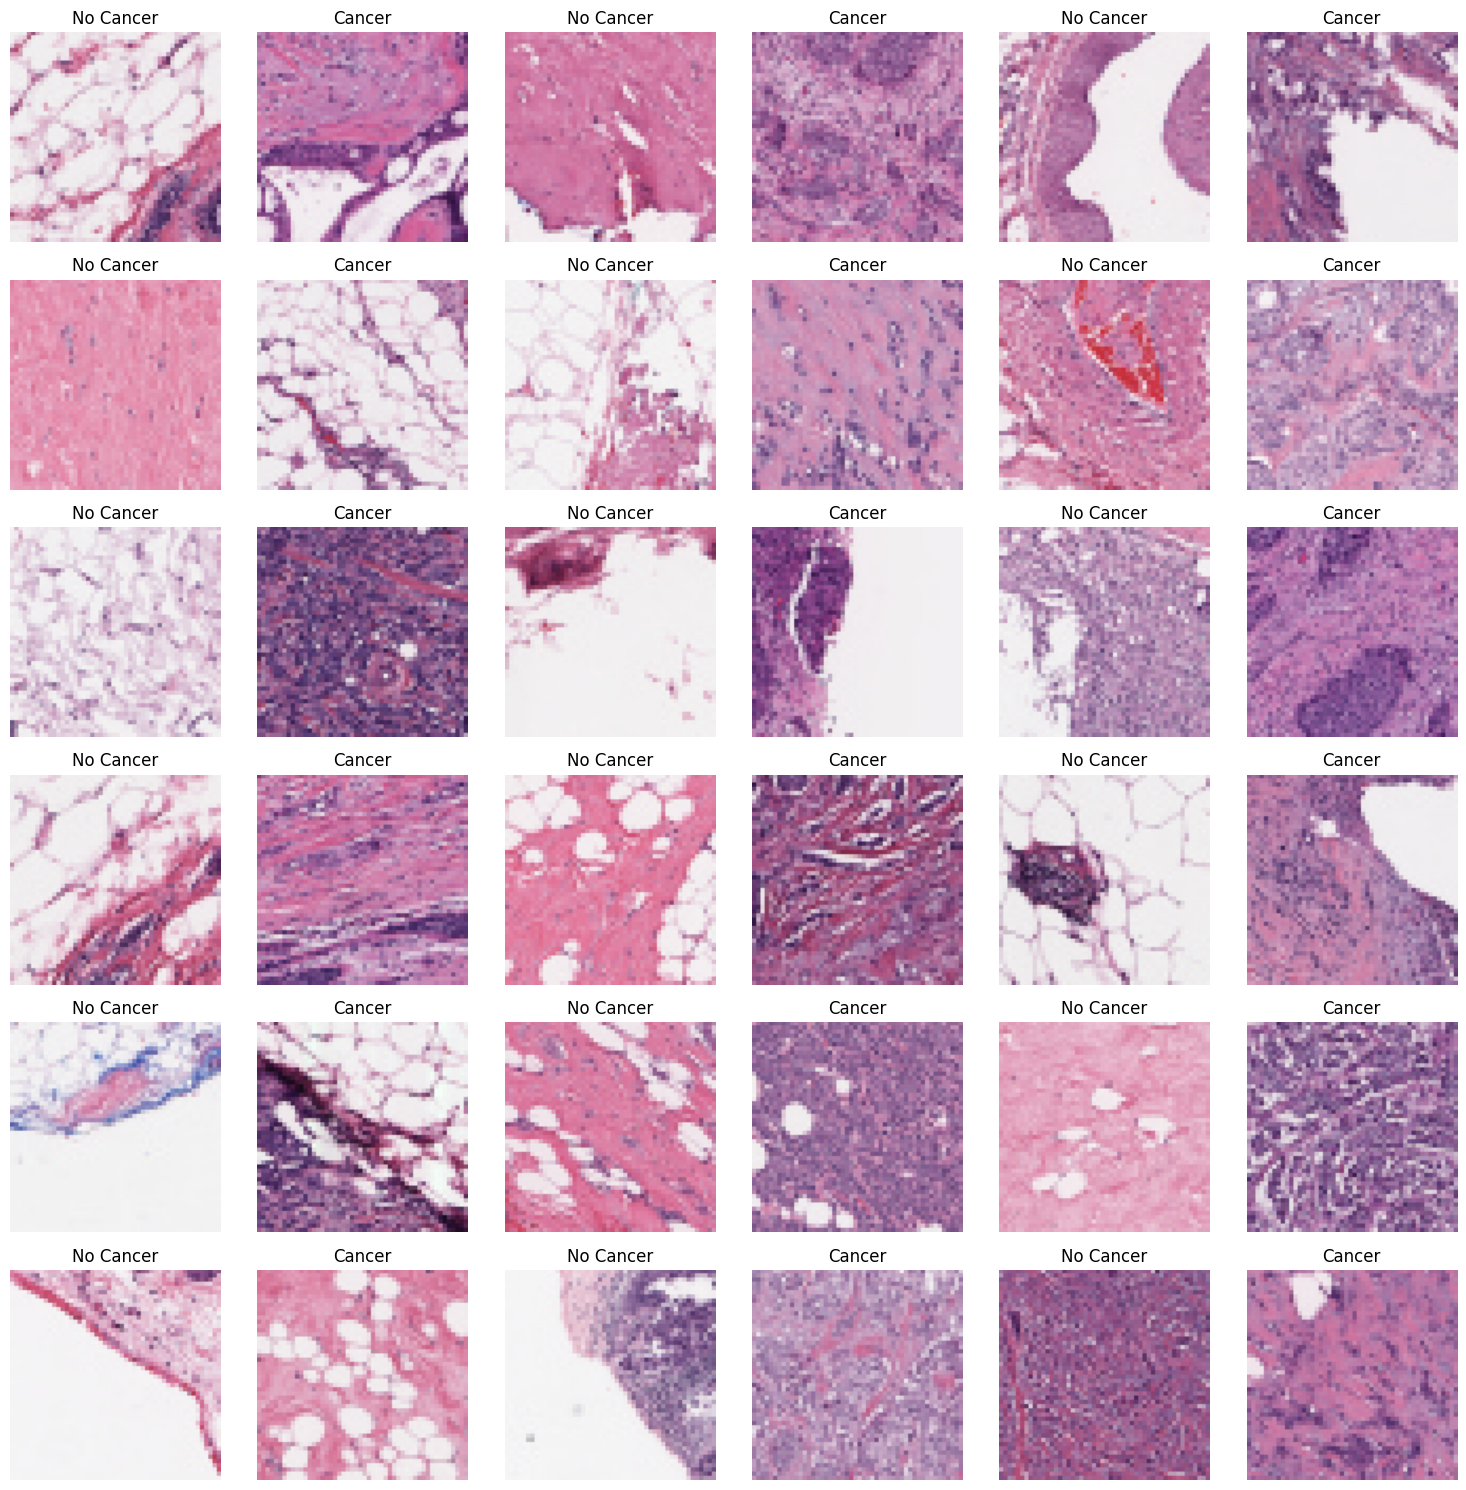

In [ ]:
plt.figure(figsize=(15, 15))
some_non = random.sample(N_IDC, 18)
some_can = random.sample(P_IDC, 18)

for i in range(18):
    img_non = image.load_img(some_non[i], target_size=(100, 100))
    plt.subplot(6, 6, 2*i+1)
    plt.imshow(img_non)
    plt.axis('off')
    plt.title('No Cancer')

    img_can = image.load_img(some_can[i], target_size=(100, 100))
    plt.subplot(6, 6, 2*i+2)
    plt.imshow(img_can)
    plt.axis('off')
    plt.title('Cancer')
plt.tight_layout()
plt.show()


In [ ]:
total = len(N_IDC) + len(P_IDC)
ppos = len(P_IDC) / total

desired = 40000
psamp = desired / total

non_img_arr, can_img_arr, non_y, can_y = [], [], [], []


target_size = (224, 224)

for img in N_IDC:
    if random.uniform(0, 1) < psamp:
        n_img = cv2.imread(img)
        if n_img is not None:

            n_img = cv2.resize(n_img, target_size)
            non_img_arr.append(n_img)
            non_y.append(0)

for img in P_IDC:
    if random.uniform(0, 1) < psamp:
        c_img = cv2.imread(img)
        if c_img is not None:
            # Resize the image to the target size
            c_img = cv2.resize(c_img, target_size)
            can_img_arr.append(c_img)
            can_y.append(1)


X = np.array(non_img_arr + can_img_arr)
y = np.array(non_y + can_y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (856, 50, 50, 3)
Testing Data Shape: (368, 50, 50, 3)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# VGG-16 architechture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(50, 50, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Classifier
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes for classification

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)              │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 50, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 1, 1, 512)      │         2,04

 Total params: 33,611,330 (128.22 MB)

 Trainable params: 33,608,386 (128.21 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [ ]:
vgg = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.6558 - loss: 4.6254 - val_accuracy: 0.5407 - val_loss: 119767.3984
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.6712 - loss: 2.6199 - val_accuracy: 0.5407 - val_loss: 1658.0399
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7014 - loss: 2.9161 - val_accuracy: 0.5407 - val_loss: 397.2970
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.6869 - loss: 1.3384 - val_accuracy: 0.5407 - val_loss: 78.1369
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.7381 - loss: 0.9592 - val_accuracy: 0.5174 - val_loss: 53.4773
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.7036 - loss: 0.9731 - val_accuracy: 0.2616 - val_loss: 10.5479
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.7724 - loss: 0.6822 - val_accuracy: 0.3837 - val_loss: 2.4328
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.8006 - loss: 0.6681 - val_accuracy: 0.66

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 955ms/step - accuracy: 0.7550 - loss: 0.5567
Test Loss: 0.5215
Test Accuracy: 0.7690
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 973ms/step
              precision    recall  f1-score   support

   No Cancer       0.84      0.71      0.77       199
      Cancer       0.71      0.84      0.77       169

    accuracy                           0.77       368
   macro avg       0.77      0.77      0.77       368
weighted avg       0.78      0.77      0.77       368



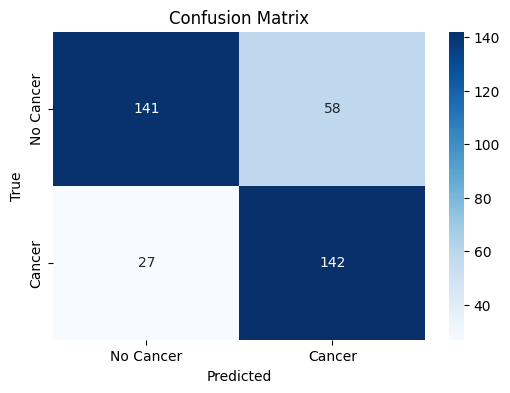

In [ ]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['No Cancer', 'Cancer']))


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Dense net

In [ ]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
total = len(N_IDC) + len(P_IDC)
ppos = len(P_IDC) / total
# Keep the same desired number of samples
desired = 40000
psamp = desired / total

non_img_arr, can_img_arr, non_y, can_y = [], [], [], []

# Define the target size for resizing
target_size = (224, 224)

for img in N_IDC:
    if random.uniform(0, 1) < psamp:
        n_img = cv2.imread(img)
        if n_img is not None:
            # Resize the image to the target size
            n_img = cv2.resize(n_img, target_size)
            non_img_arr.append(n_img)
            non_y.append(0)

for img in P_IDC:
    if random.uniform(0, 1) < psamp:
        c_img = cv2.imread(img)
        if c_img is not None:
            # Resize the image to the target size
            c_img = cv2.resize(c_img, target_size)
            can_img_arr.append(c_img)
            can_y.append(1)


X = np.array(non_img_arr + can_img_arr)
y = np.array(non_y + can_y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

In [ ]:

base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_497"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,168,962 (27.35 MB)

 Trainable params: 131,458 (513.51 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 190s 8s/step - accuracy: 0.5078 - loss: 9.8938 - val_accuracy: 0.5698 - val_loss: 4.3698
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 173s 8s/step - accuracy: 0.5359 - loss: 6.1671 - val_accuracy: 0.7151 - val_loss: 2.3115
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 170s 8s/step - accuracy: 0.5693 - loss: 5.0346 - val_accuracy: 0.7151 - val_loss: 2.8071
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.5830 - loss: 4.5183 - val_accuracy: 0.7442 - val_loss: 2.8423
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.6118 - loss: 4.4180 - val_accuracy: 0.7500 - val_loss: 2.8179
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 172s 8s/step - accuracy: 0.6744 - loss: 3.5098 - val_accuracy: 0.7500 - val_loss: 2.5867
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 172s 8s/step - accuracy: 0.6362 - loss: 3.8271 - val_accuracy: 0.7442 - val_loss: 2.5346
12/12 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.6127 - loss: 2.4637

Test Loss: 2.5147
Test Accuracy: 0.61

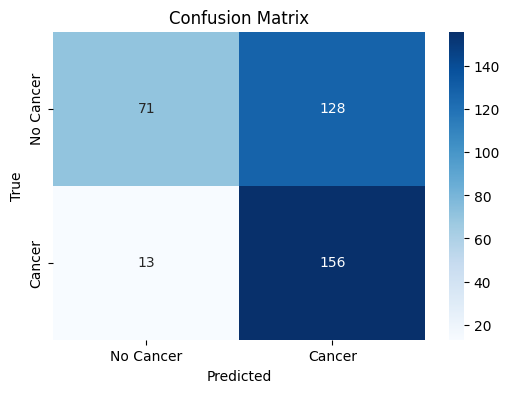

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model (moved from previous cell)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

dense = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stop])


loss, acc = model.evaluate(X_test, Y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=['No Cancer', 'Cancer']))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Test with given image

In [ ]:
# Save the trained model architecture
model_json = model.to_json()
with open("/content/drive/MyDrive/dataset/sdb/idc_cancer_model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights
model.save_weights("/content/drive/MyDrive/dataset/sdb/idc_best_model.weights.h5")
print("Model architecture and weights saved.")

Model architecture and weights saved.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

def predict_idc_image(image_path):
    # Load model architecture
    with open("/content/drive/MyDrive/dataset/sdb/idc_cancer_model.json", "r") as json_file:
        model_json = json_file.read()

    model_c = model_from_json(model_json)

    # Load the saved weights
    model_c.load_weights("/content/drive/MyDrive/dataset/sdb/idc_best_model.weights.h5")

    # Compile the model
    opt = SGD(learning_rate=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (50, 50))  # Match training size
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the image
    prediction = model_c.predict(image)
    predicted_class = np.argmax(prediction)

    label_map = {0: "No Cancer", 1: "Cancer"}

    # Show image and prediction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {label_map[predicted_class]}")
    plt.axis('off')
    plt.show()

    print("Predicted Label:", label_map[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


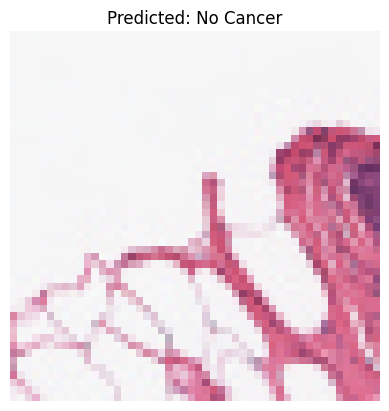

Predicted Label: No Cancer


In [ ]:
predict_idc_image("/content/8863_idx5_x201_y401_class0.png")